# Introduction
The sinking of Titanic is one of the most notorious shipwredcks in the history.In 1912, during her voyage, the titanc sank after colliding with an iceberg, killing 1502 of 2224 passengers and crew.

<font color = 'blue'>

Content: 

1. [Load and Check Data](#1) 
    
2. [Variable Description](#2) 
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
    
3. [Basic Data Analysis](#6)

4. [Outlier Detection](#7)

5. [Missing Value](#8)
    
    *[Find Missing Value](#9)
    
    *[Fill Missing Value](#10)
    
6. [Visualization](#11)
    
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    
    * [Sibsp -- Survived](#13)
    
    * [Parch -- Survived](#14)
    
    * [Pclass -- Survived](#15)
    
    * [Age -- Survived](#16)

    * [Pclass -- Survived -- Age](#17)
    
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    
    * [Embarked -- Sex -- Fare -- Survived](#19)

    * [Fill Mising: Age Feature](#20)

7. [Feature Engineering](#21) 

    * [Name -- Title](#22)

    * [Family Sıze](#23)

    * [Embarked](#24)

    * [Ticket](#25)

    * [Pclass](#26)

    * [Sex](#27)

    * [Drop Passenger ID and Cabin](#28)

8. [Modelling](#29)

    * [Train - Test - Split](#30)

    * [Simple Logistic Regression](#31)

    * [Hyperparameter Tuning -- Gri Search -- Cross Validation](#32)

    * [Ensemble Modeling](#33)

    * [Prediction and Submission](#34)

In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# seaborn-whitegrid uses style
plt.style.use('seaborn-v0_8-whitegrid')

import seaborn as sns

from collections import Counter

import warnings 
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [112]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


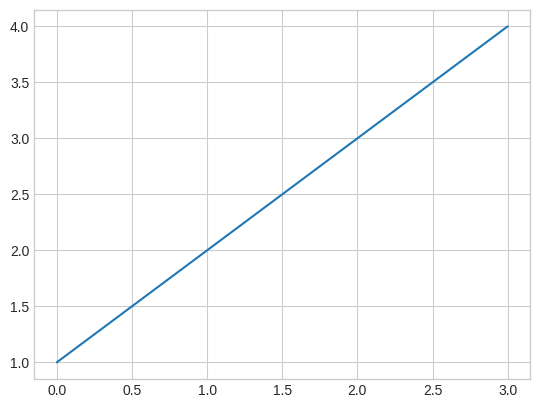

In [113]:
a = [1,2,3,4]
plt.plot(a)
plt.show()

<a id= '1'></a> 
   
# Load and Check Data

In [114]:
train_df = pd.read_csv("../../data/titanic_train.csv")
test_df = pd.read_csv("../../data/titanic_test.csv")
test_PassengerId = test_df['PassengerId']

In [115]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id= '2'></a> 
   
# Variable Description

1. PassengerId --> unique id number to each passenger 
1. Survived --> passenger survive(1) or died(0)
1. Pclass --> passenger class 
1. Name -- > name 
1. Sex --> gender of passenger
1. Age --> age of passenger
1. SibSp --> number of siblings/spouses
1. Parch --> number of parents/children 
1. Ticket --> ticket number
1. Fare --> amount of money spent of ticket
1. Cabin --> cabin category
1. Embarked --> port where passenger embarked (C = Cherbourg,Q = Queenstown, S = Southampton)

survived = 0 --> ölü

pclass --> yolcuların sınıfları

SibSp:

sib --> siblings --> kardeşler 

sp --> spouses --> karı-koca

Parch:

par --> parnet --> ebeveynler

ch --> children --> çocuklar

Fare --> ücret

Cabin --> Gemi içinde kalınan oda numarası

Embarked --> Gemiye hangi limandan binildiği

<a id= '3'></a> 

# Univariate Variable Analysis

    * Categorical Variable : Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
    * Numerical Variable : Fare, age and passengerid

<a id= '4'></a> 

## Categorical Variable

In [118]:
def bar_plot(variable):
    
    
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    
    # get feature
    var = train_df[variable]
    
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize 
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

<img src="../../img/variable.png" width="750" height="300">  

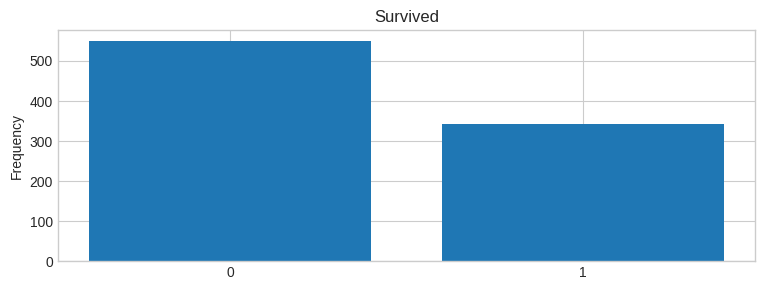

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


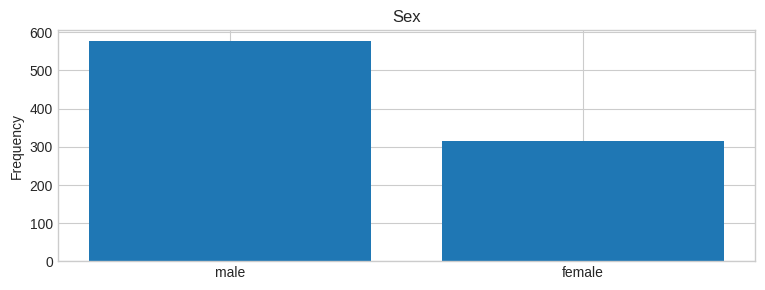

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


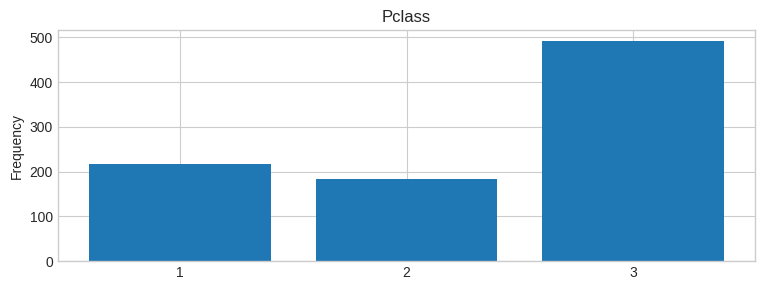

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


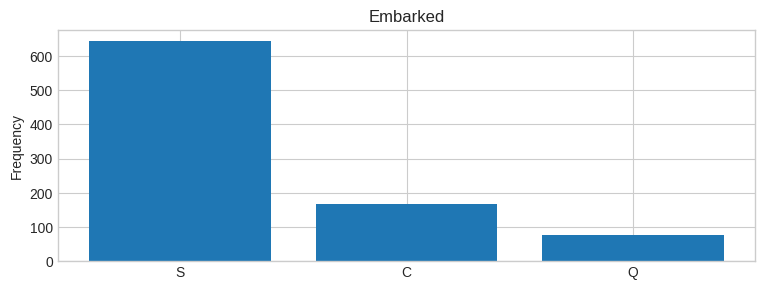

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


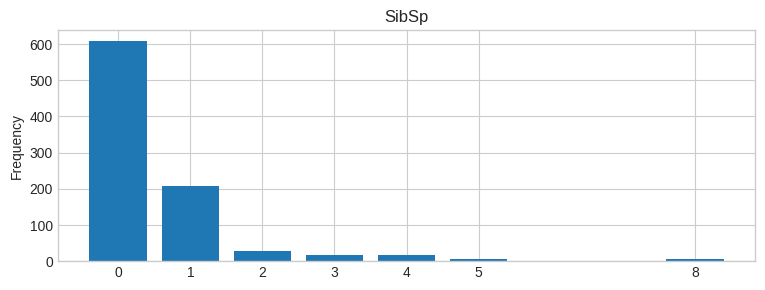

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


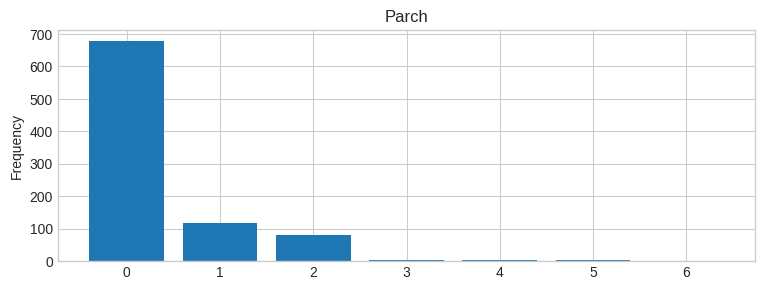

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [119]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [120]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



<a id= '5'></a> 

## Numerical Variable

In [121]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")# ilgili feature ait kaç sample var
    plt.title("{} distibution with hist".format(variable))
    plt.show()

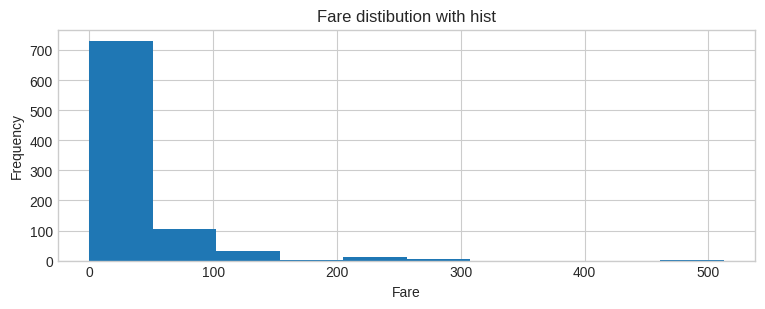

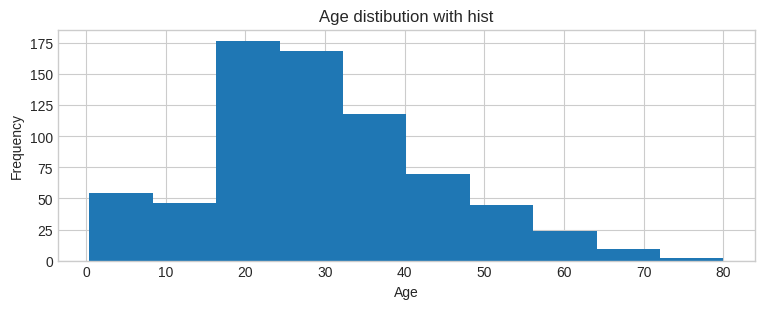

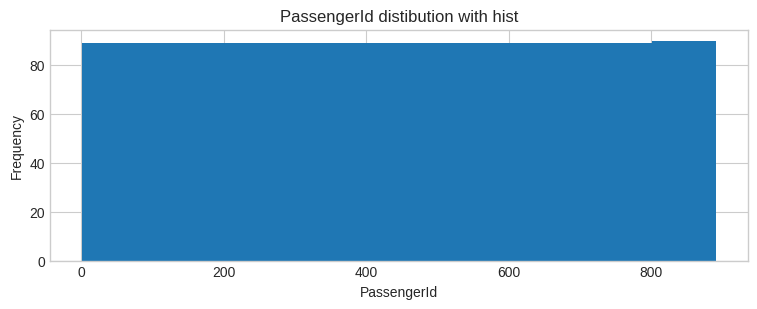

In [122]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

Sonuç --> passengerId önemli bir sonuç parametresi değil.

In [123]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 800)
    plt.xlabel(variable)
    plt.ylabel("Frequency")# ilgili feature ait kaç sample var
    plt.title("{} distibution with hist".format(variable))
    plt.show()

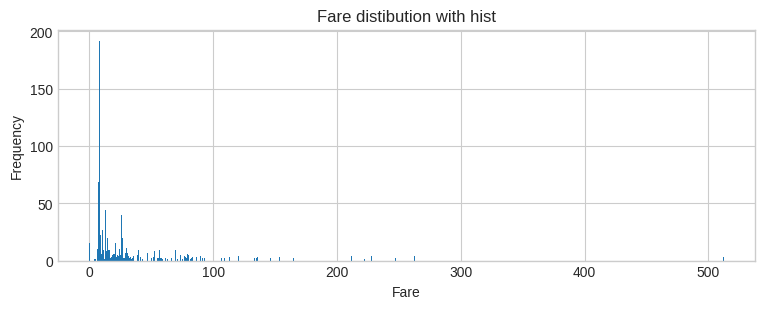

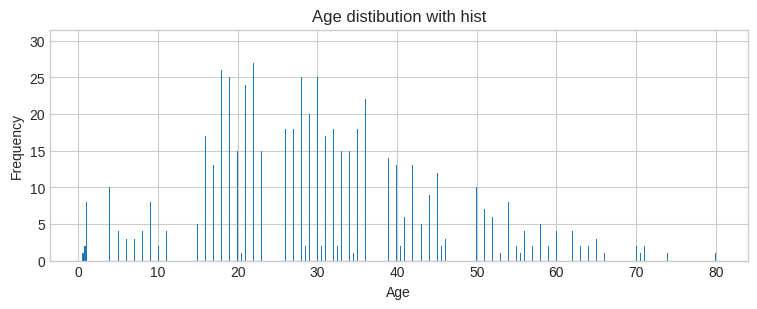

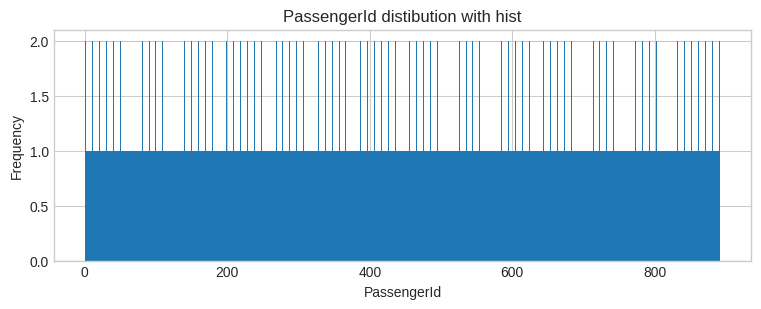

In [124]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id= '6'></a> 

# Basic Data Analysis

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

Feature arası özellikler incelenir

In [125]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() # guruplanır ve ortalaması gösterilir

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [126]:
# SibSp vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id= '7'></a> 

# Outlier Detection

Ayrık değerlerden kurtulmak.

<img src="../../img/outlier.png" width="800" height="400">  

In [127]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier Step
        outlier_step = IQR * 1.5
        
        #detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 - outlier_step)].index
        
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [128]:
# Counter için örnek

a = ["a","a","a","a","b","b"]
Counter(a)

Counter({'a': 4, 'b': 2})

Bir tane outlier olduğunda veya bir özellik içinde outlier olduğunda onu her zaman çıkarmak doğru olmayabilir düşünülmesi gerekir.

In [129]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [130]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id= '8'></a> 

# Missing Value

* Find Missing Value

* Fill Missing Value

train ve test datalarının hepsine missing uygulanmalı çünkü eğer sadece traine uygulanırsa ml modellemesinde test verileri hata verir.

In [131]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop = True) # yukarıdan aşağıya birleştir

In [132]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1092,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1093,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id= '9'></a> 

## Find Missing Value


In [133]:
train_df.columns[train_df.isnull().any()] # hangi feature içinde nan veri var

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [134]:
train_df.isnull().sum() # toplam kaç tane nan veri var

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            243
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          864
Embarked         2
dtype: int64

<a id= '10'></a> 

## Fill Missing Value

* Embarked has 2 missing value 
* Fare has only 1

In [135]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
633,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Karşılaştırılabilecek bir diğer özelliğe karar veriyoruz.

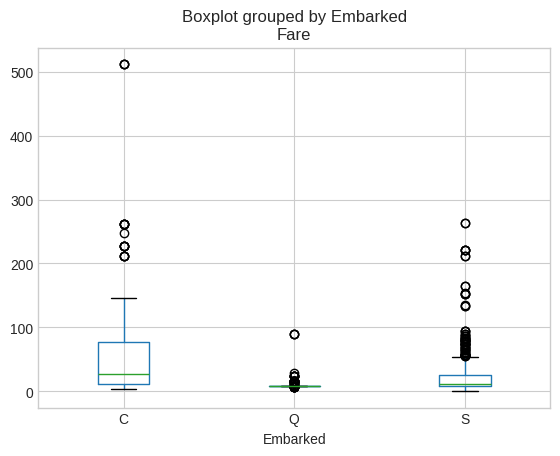

In [136]:
train_df.boxplot(column = "Fare",by = "Embarked")
plt.show()

Yeşil çizgi --> medyan değerleri

Embarked nan olan yolcuların fare değeri 80 bundan dolayı c olma olasılığı daha yüksek.

Bundan dolayı embarked c olarak doldurmak mantıklı.

In [137]:
train_df["Embarked"] = train_df["Embarked"].fillna(c)

In [138]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [139]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
830,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [140]:
train_df[train_df["Pclass"] == 3]["Fare"]

0        7.2500
2        7.9250
4        8.0500
5        8.4583
9        8.0500
         ...   
1090     7.7750
1091     8.0500
1093     7.2500
1094     8.0500
1095    22.3583
Name: Fare, Length: 599, dtype: float64

In [141]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"]) # 3. sınıf yolcular ort ne kadar ödemiş

10.907475250836121

In [142]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [143]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= '11'></a> 

# Visualization

<a id= '12'></a> 

## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

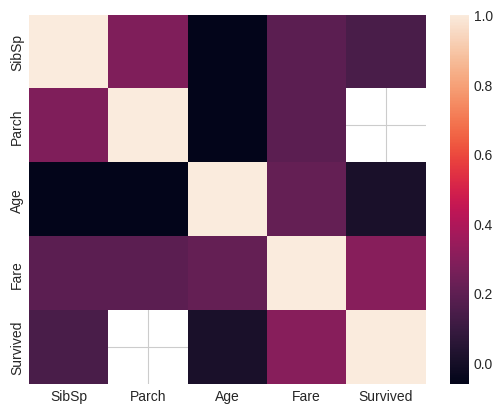

In [144]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = False, fmt =".2f") # fmt --> virgülden sonra 2 basamak görünsün. # corr --> korelasyon matrisi
plt.show()

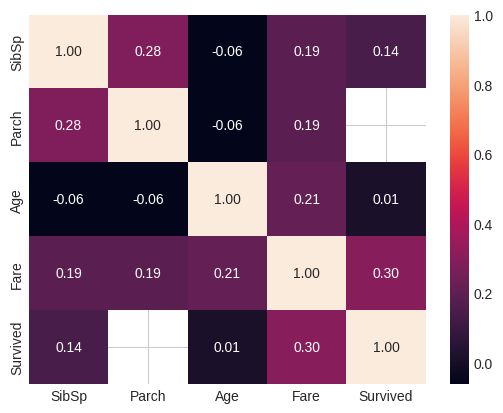

In [145]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt =".2f") # fmt --> virgülden sonra 2 basamak görünsün. # corr --> korelasyon matrisi
plt.show()

Ücret özelliğinin hayatta kalan özellik ile korelasyonu var gibi görünüyor (0,26).

<a id= '13'></a> 

## Sibsp -- Survived

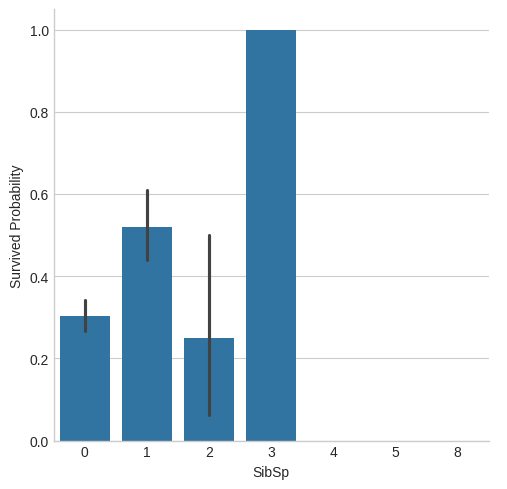

In [146]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

Eğer 2'den fazla SibSp değerine sahipse survived olasılığı azalıyor.

<a id= '14'></a> 

## Parch -- Survived

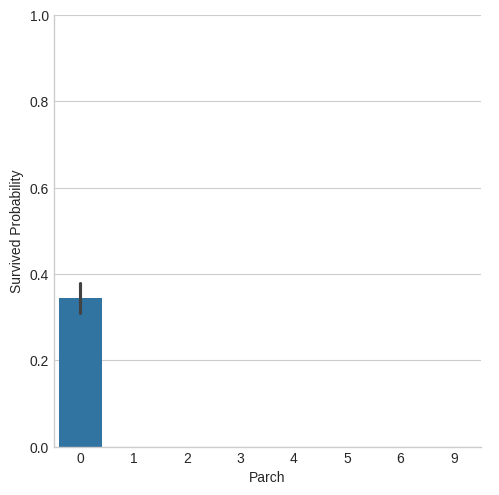

In [147]:
g = sns.catplot(x = "Parch", y ="Survived",kind = "bar", data = train_df)
g.set(ylim=(0, 1))
g.set_ylabels("Survived Probability")
plt.show()

<a id= '15'></a> 

## Pclass -- Survived

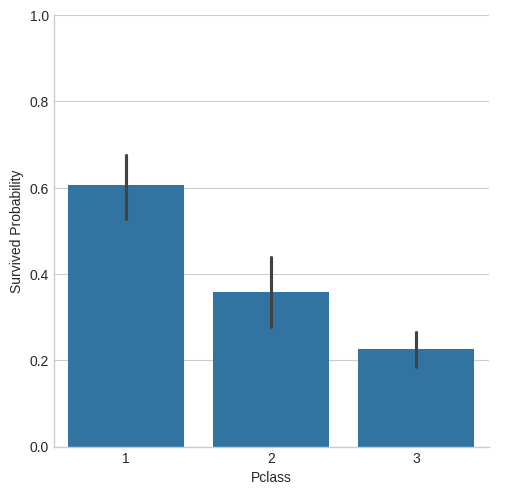

In [148]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar")
g.set(ylim=(0, 1))
g.set_ylabels("Survived Probability")
plt.show()

<a id= '16'></a> 

## Age -- Survived

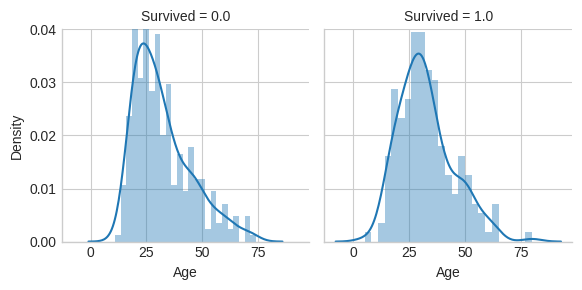

In [149]:
g = sns.FacetGrid(train_df, col = "Survived")
g.set(ylim=(0, 0.04))
g.map(sns.distplot, "Age", bins =25)
plt.show()

* yaş <= 10 yüksek hayatta kalma oranına sahiptir,
* En yaşlı yolcu (80) hayatta kaldı,
* 20 yaşındaki çok sayıda kişi hayatta kalamadı,
* yolcuların çoğu eğitimde
* eksik age değeri için yaş dağılımını kullanın

<a id= '17'></a> 

## Pclass -- Survived -- Age

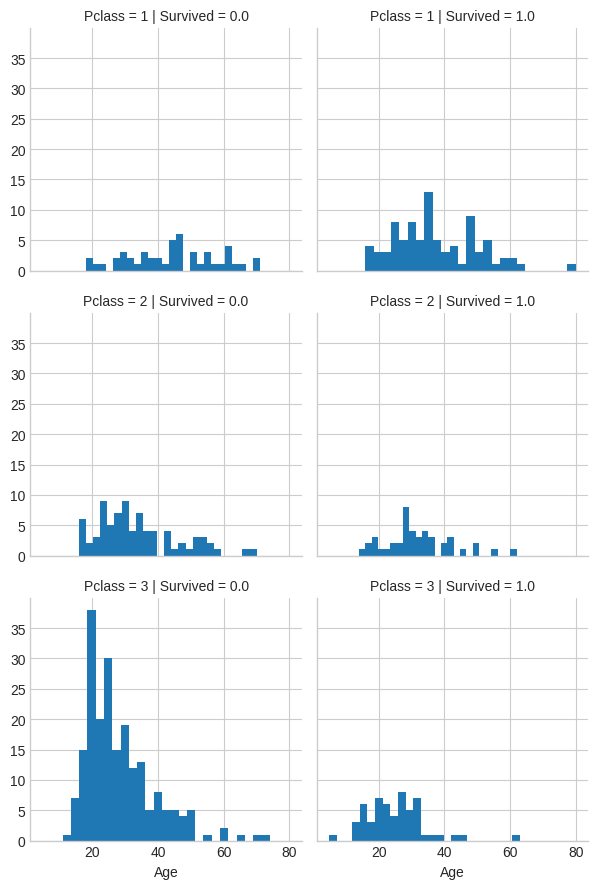

In [150]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

<a id= '18'></a> 

## Embarked -- Sex -- Pclass -- Survived

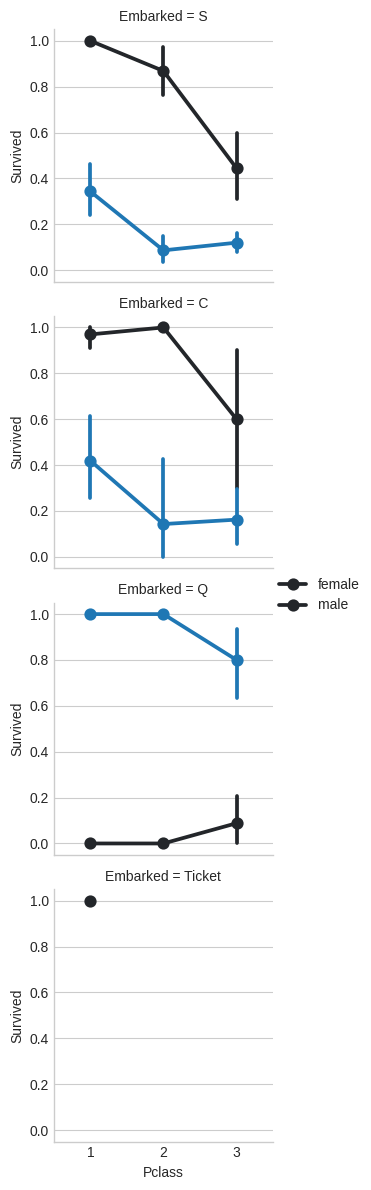

In [151]:
g = sns.FacetGrid(train_df, row = "Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

Kadın yolcunun hayatta kalma oranı erkeklerden çok daha iyi

<a id= '19'></a> 

## Embarked -- Sex -- Fare -- Survived

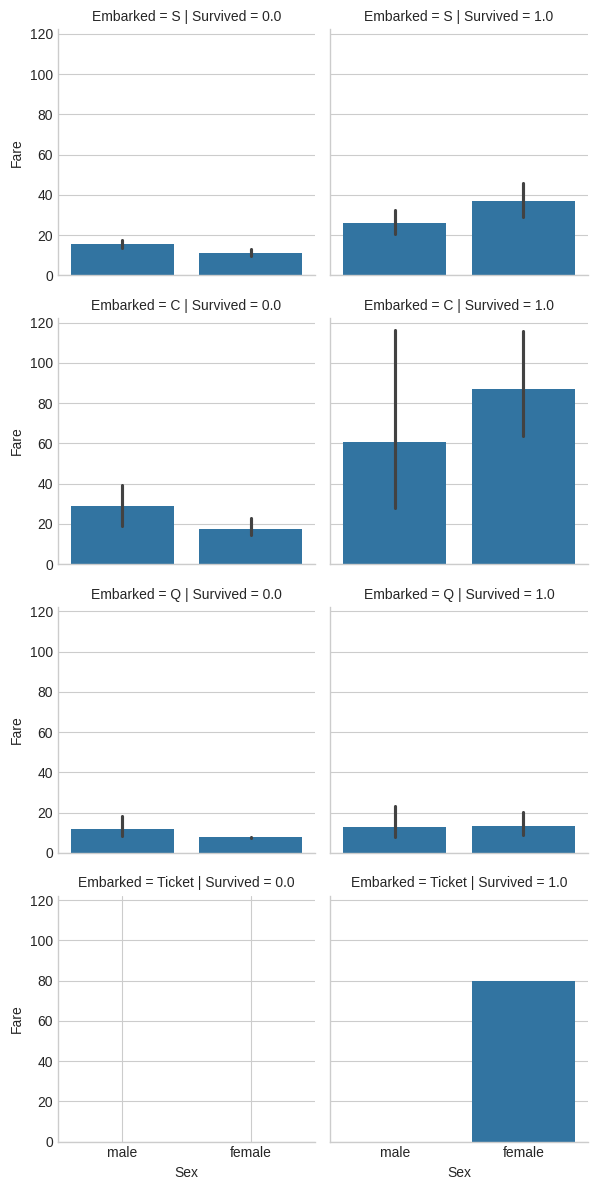

In [152]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()                  

* Daha yüksek ücret ödeyen yolcuların hayatta kalma şansı daha yüksektir. Ücret eğitim için kategorik olarak kullanılabilir.

<a id= '20'></a> 

## Fill Mising: Age Feature

In [153]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
14,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
19,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
20,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1088,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


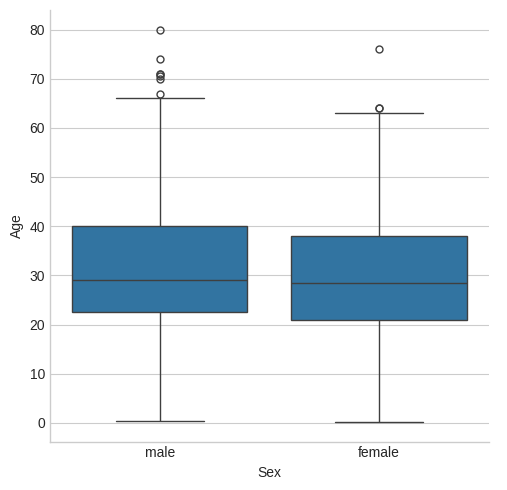

In [154]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

* Cinsiyet, yaş tahmini için bilgilendirici değildir, yaş dağılımı aynı görünmektedir

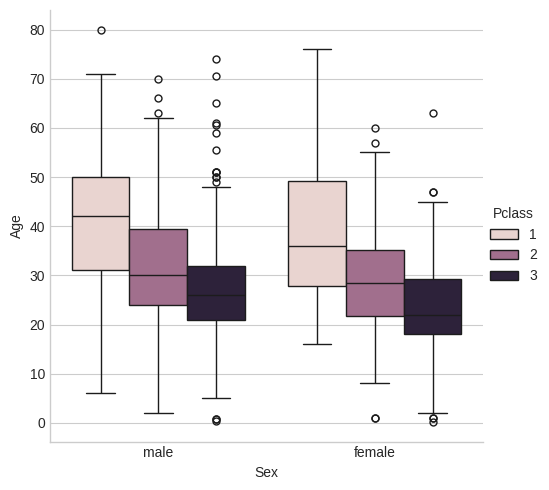

In [155]:
sns.catplot(x = "Sex", y = "Age",hue = "Pclass", data = train_df, kind = "box")
plt.show()

* 1. sınıf yolcular 2. sınıftan, 2. sınıf yolcular ise 3. sınıftan büyüktür.

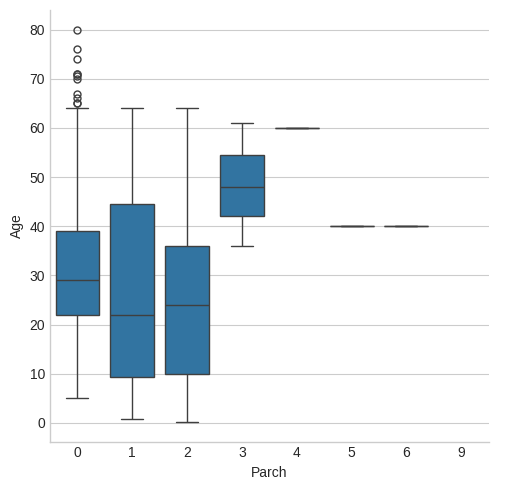

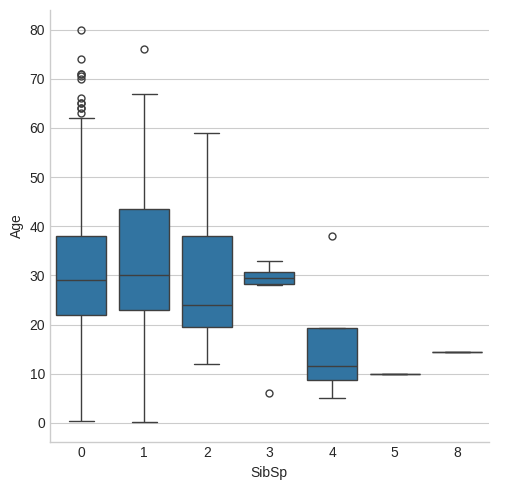

In [156]:
sns.catplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.catplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [157]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

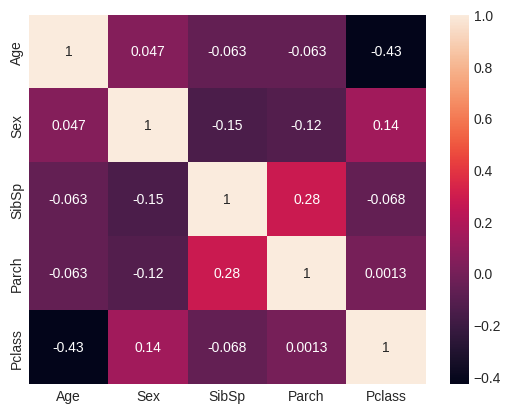

In [158]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

* Yaş cinsiyetle ilişkili değildir ancak parch, sibsp ve pclass ile ilişkilidir.

In [159]:
index_nan_age = (train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred

    else:
        train_df["Age"].iloc[i] = age_med

In [160]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= '21'></a> 

# Feature Engineering

<a id= '22'></a> 

## Name -- Title

In [161]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                  Nasser, Mrs. Nicholas (Adele Achem)
8                             Bonnell, Miss. Elizabeth
9                       Saundercock, Mr. William Henry
Name: Name, dtype: object

In [162]:
s = "McCarthy, Mr. Timothy J"
s.split(".")[0].split(",")[-1].strip()

'Mr'

In [163]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [164]:
train_df["Title"].head(10)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7     Mrs
8    Miss
9      Mr
Name: Title, dtype: object

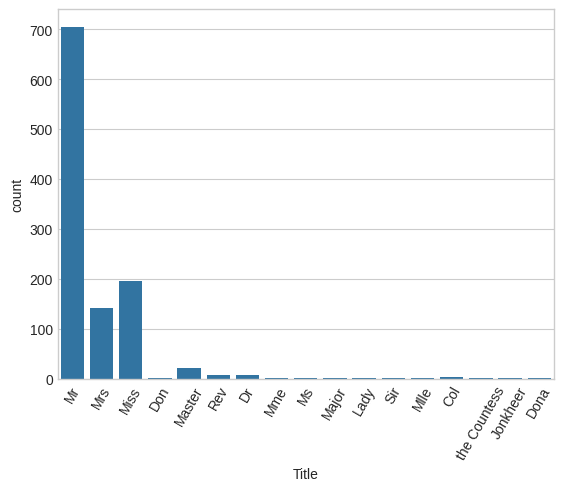

In [165]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [166]:
# kategori haline getirme 
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     1
8     1
9     2
10    1
11    1
12    2
13    1
14    1
15    2
16    2
17    1
18    2
19    2
Name: Title, dtype: int64

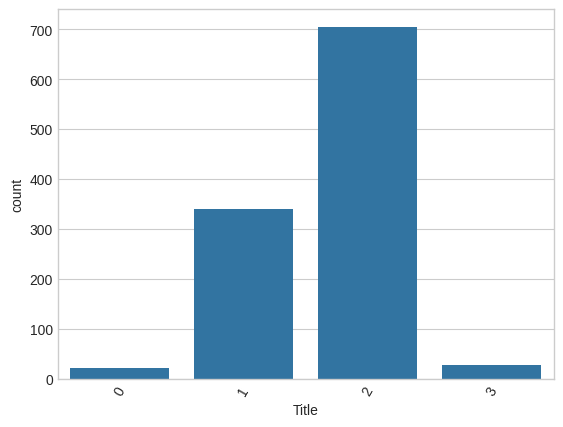

In [167]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

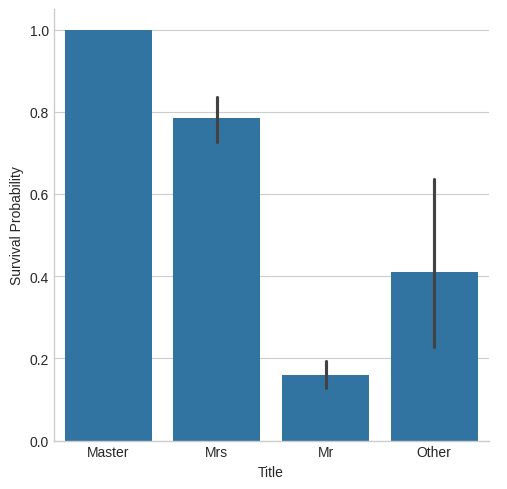

In [168]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [169]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [170]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [171]:
train_df = pd.get_dummies(train_df,columns=["Title"],dtype = int) # Title sütununu kategorik haline getirdi.
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id= '23'></a> 

## Family Sıze

In [172]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


* Parch ve Sipsp birleşecek ve Family Sıze elde edilecek.

In [173]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

+ 1 ---> parchden de sibspden de 0 geldiğinde 0 + 0 eder fakat aile 0 kişiden oluşuyor mantıksızdır birey de ailedi bundan dolayı +1.

In [174]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


Fsize ve Survived arası ilişki

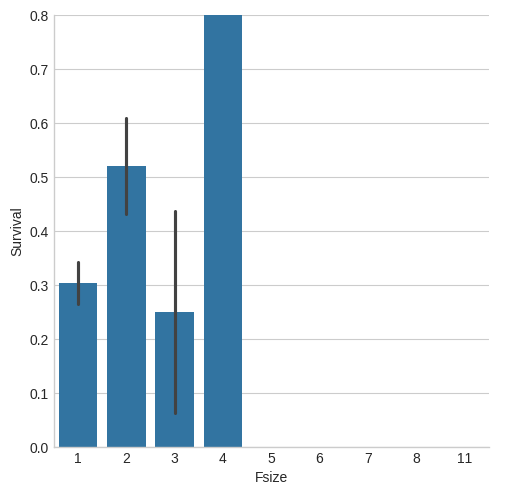

In [175]:
g = sns.catplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set(ylim=(0, 0.8))
g.set_ylabels("Survival")

* Kategori yapılacak.

In [176]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [177]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1
8,12,1.0,1,0,58.0,0,0,113783,26.5500,C103,S,0,1,0,0,1,1
9,13,0.0,3,1,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,0,1,0,1,1


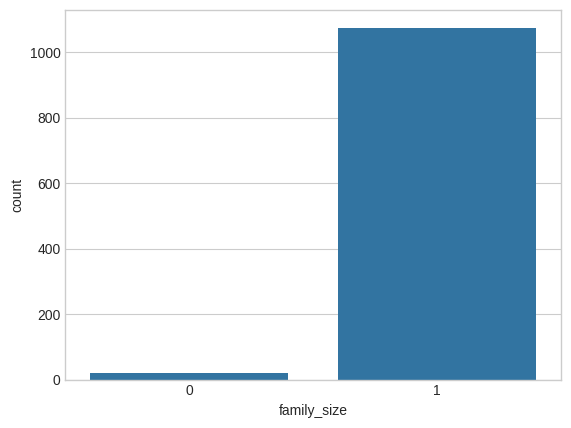

In [178]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

* Hayatta kalma ile ilişkisi.

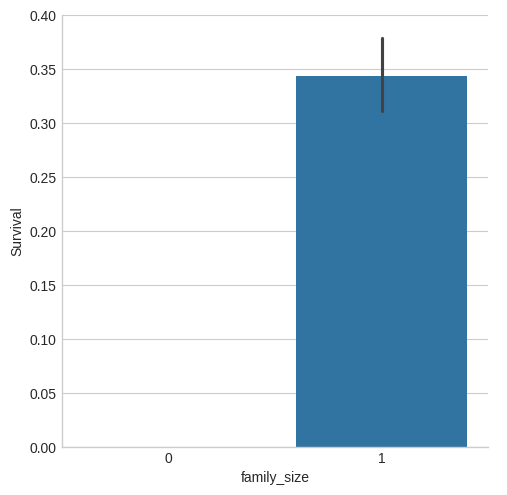

In [179]:
g = sns.catplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set(ylim=(0, 0.4))
g.set_ylabels("Survival")
plt.show()

* Büyük ailelerin hayatta kalma oranı daha düşüktür.

* Small families have more chance to survive than large families.

In [180]:
train_df =pd.get_dummies(train_df, columns = ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,False,True
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,False,True


In [181]:
train_df["family_size_0"] = train_df["family_size_0"].astype(int)
train_df["family_size_1"] = train_df["family_size_1"].astype(int)

In [182]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id= '24'></a> 

## Embarked

* Yolcuların hangi limandan bindikleri.

In [183]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

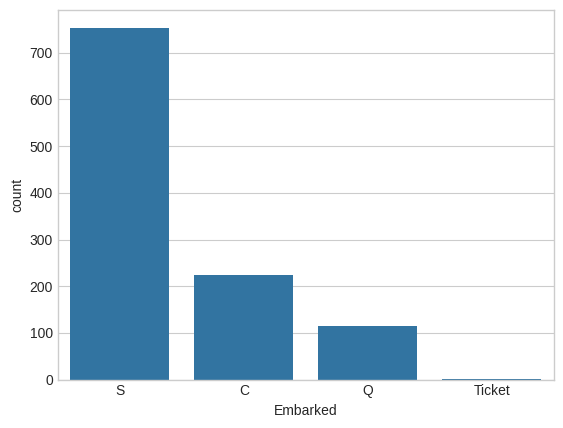

In [184]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

* Embarked kaldırılacak onun yerine kategori haline getirilecek.

In [185]:
train_df = pd.get_dummies(train_df,columns = ["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Embarked_Ticket
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,2,0,1,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,2,0,1,True,False,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,1,0,1,False,False,True,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,...,1,0,0,2,0,1,False,False,True,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,...,0,1,0,1,0,1,False,False,True,False


In [186]:
train_df["Embarked_C"] = train_df["Embarked_C"].astype(int)
train_df["Embarked_Q"] = train_df["Embarked_Q"].astype(int)
train_df["Embarked_S"] = train_df["Embarked_S"].astype(int)
train_df["Embarked_Ticket"] = train_df["Embarked_Ticket"].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Embarked_Ticket
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,2,0,1,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,2,0,1,1,0,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,1,0,1,0,0,1,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,...,1,0,0,2,0,1,0,0,1,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,...,0,1,0,1,0,1,0,0,1,0


<a id= '25'></a> 

## Ticket

In [187]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               237736
8               113783
9            A/5. 2151
10              350406
11              248706
12              244373
13              345763
14                2649
15              239865
16              248698
17              330923
18              113788
19                2631
Name: Ticket, dtype: object

In [188]:
a = "A/5 21171"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [189]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [190]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9         A5
10         x
11         x
12         x
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [191]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Embarked_Ticket
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,...,0,1,0,2,0,1,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,...,1,0,0,2,0,1,1,0,0,0
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,...,1,0,0,1,0,1,0,0,1,0
3,4,1.0,1,0,35.0,1,0,x,53.1000,C123,...,1,0,0,2,0,1,0,0,1,0
4,5,0.0,3,1,35.0,0,0,x,8.0500,NaN,...,0,1,0,1,0,1,0,0,1,0


In [192]:
train_df = pd.get_dummies(train_df,columns = ["Ticket"], prefix = "T", dtype=int)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,1,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,1,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,10,1.0,2,0,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1
8,12,1.0,1,0,58.0,0,0,26.5500,C103,0,...,0,0,0,0,0,0,0,0,0,1
9,13,0.0,3,1,20.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,0


* prefix = "T" --> Sütun adları oluştururken ticket_sotono2 yerine t_sotono2 olarak oluştur.

<a id= '26'></a> 

## Pclass

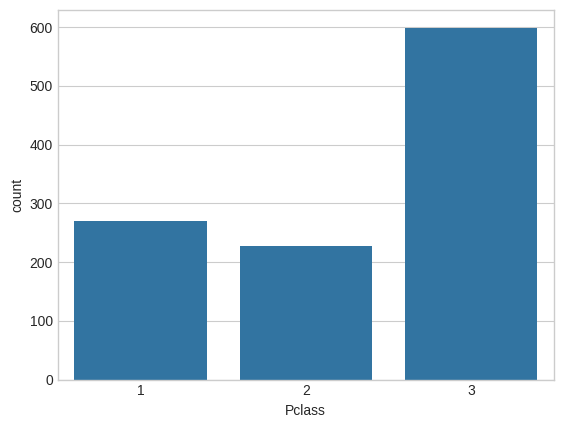

In [193]:
sns.countplot( x = "Pclass", data = train_df)
plt.show()

In [194]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns = ["Pclass"],dtype = int)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id= '27'></a> 

## Sex

In [195]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"],dtype = int)
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id= '28'></a> 

## Drop Passenger ID and Cabin

In [196]:
train_df.drop(labels = ["PassengerId","Cabin"],axis = 1, inplace=True)

In [197]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_Ticket', 'T_A',
       'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON',
       'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id= '29'></a> 

# Modeling

In [198]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id= '30'></a> 

## Train - Test - Split

In [199]:
train_df_len

678

In [200]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"], axis = 1, inplace = True)

In [201]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
678,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
679,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
680,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
681,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
682,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [202]:
train = train_df[:train_df_len]
x_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.33, random_state=42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))


x_train 454
x_test 224
y_train 454
y_test 224
test 418


* train ve test olarak ayrılır model haırlandıktan sonra hiç denenmemiş bir test verisi ile model denenir.

<a id= '31'></a> 

## Simple Logistic Regression

In [203]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2)
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Training Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.6
Training Accuracy: % 83.04


<a id= '32'></a> 

## Hyperparameter Tuning -- Gri Search -- Cross Validation

5 adet sınıflandırıcıyı karşılaştıracağız ve her birinin ortalama doğruluğunu, katmanlı çapraz doğrulamayla değerlendireceğiz.

* Decision Tree
* SVM
* Random Forest
* KNN 
* Logistic Regression

In [204]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [205]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.832608695652174
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8015942028985507
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8304830917874396
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/irem/Desktop/machine_learning/machine_learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/irem/Desktop/machine_learning/machine_learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

0.8258937198067633
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7950724637681159


Text(0.5, 1.0, 'Cross Validation Scores')

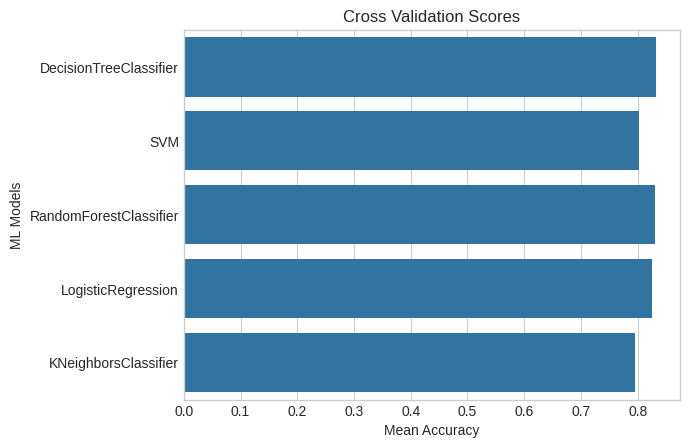

In [208]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot(x = "Cross Validation Means", y = "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id= '33'></a> 

## Ensemble Modeling

In [210]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

/home/irem/Desktop/machine_learning/machine_learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8035714285714286


<img src="../../img/voting.png" width="750" height="300">  

<a id= '34'></a> 

## Prediction and Submission

In [211]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

In [212]:
test_survived

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64